In [1]:
import HYuPlot as hyuplt 
import FerrersModel as ferrers
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cl

import astropy.io.fits as ft

from data_functions import get_kinematics

In [2]:
#Import GALAH DR4 data
filename='./data/galah_dr4_vac_dynamics_240207.fits'

Galah=ft.open(filename)

galah_dynamics=Galah[1].data
Galah.close()

In [3]:
#E_J=-.75, y0=-1.65 (LSR?)
#-.72;-1.65 (Hyades)
#-.67;-1.85 (Hyades) 
L_Z=galah_dynamics['L_Z']
V_R=galah_dynamics['vR_Rzphi']
cdt_good = ~np.isnan(L_Z) & ~np.isnan(V_R)
cdt_SNd=(galah_dynamics['X_XYZ']**2+galah_dynamics['Y_XYZ']**2)<1 & (np.abs(galah_dynamics['z_Rzphi'])<1)

In [4]:
#E_J=-.75, y0=-1.65 (LSR?)
#-.72;-1.65 (Hyades) actually part of the Trojan family
#-.67;-1.85 (Hyades?) -4:1
#-.65;-2.18 -4:1 group 
#-.75;-2 -4:1
#-.8;-2.2 outer disk: Arch/Hat

# How about Horn?
# Most of these orbits are symmetric, what caused teh asymmetry in Horn/Sirius

#Theory: 
# -4:1 QPO groups form Hyades
# Asymmetry in Sirius: -4:1 at lower E_J? #not certain
# LSR/Coma: Outer Circular
# 

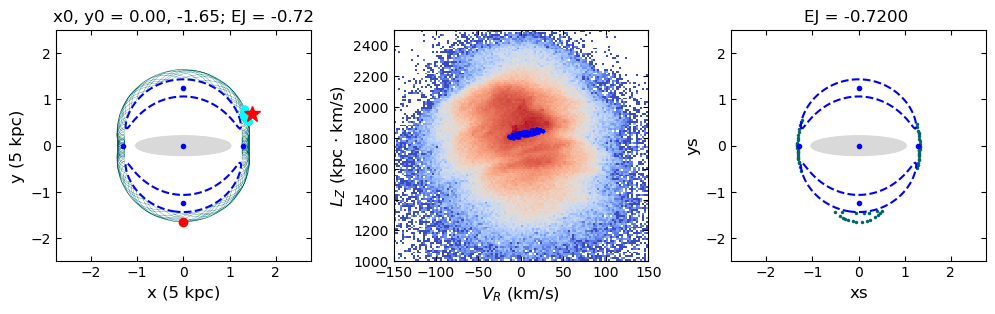

In [15]:
# Let's make some plots about our orbits 
# creat a 1x3 grid
plot=hyuplt.PlotGrid(figsize=(3,12),gridshape=(1,3))
plot.wspace=.325 #allow some extra wspace for labels

# Let's be simple, just one subplot per gridpoint
plot.GetAXS()
plot.xlabel=None
plot.ylabel=None
plot.title=""
# 'Three typical plots used for Ferrers Project'
plot.FigLabel()

# get the axs
axs=plot.axs

# define the initial condition with EJ
init=ferrers.InitialCondition()
init.ej=-.72
init.y0=-1.65
init.InitFromEj()

# Get an instance from orbitplot
orbitplot=ferrers.PlotFerrers(init=init)


# plot the orbit in the XY plane in the first subplot
ax=axs[0]

# integrate orbit
# orbitplot.orbit.tmax=10000
orbitplot.GetOrbit()

# plot the XY plane
orbitplot.PlotXY(linewidth=.2,ax=ax)

# plot the sun and SNd passing orbits
orbitplot.PlotSNd(ax=ax,markersize=12)


# plot the SNd-LzVr in the second subplot (M2K)
ax=axs[1]
# Usually we do this on top of the LzVr density in the solar neighbourhood
cdt = cdt_good & cdt_SNd
picrange=[[-150,150],[1000,2500]]
X=V_R[cdt]
Y=L_Z[cdt]
ax.hist2d(X,Y,
           bins=120,
           cmap="coolwarm",
           norm=cl.LogNorm(),
           zorder=1,
           range=picrange,
           )

Lz_Nd,vr_Nd=orbitplot.PlotM2K(ax=ax,zorder=10,markersize=.1) 

# plot the surface of secation of this orbit in the third plot
ax=axs[2]
xs,ys=orbitplot.PlotSOS(ax=ax,label="hyades-related")

plt.show()